In [56]:
import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import legendre

Exercise1

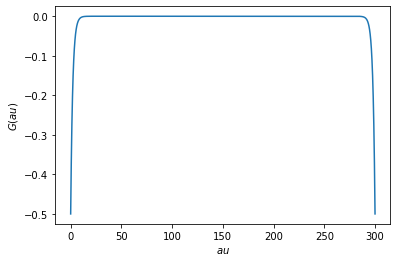

In [60]:
U = 1
beta = 300

def G(tau):
    z = -1/2 * (np.e ** (-tau * U/2)/(1 + np.e ** (-beta * U/2)) + np.e ** (tau * U/2)/(1 + np.e ** (beta * U/2)))
    return z

tau = np.linspace(0, beta, 1000)

plt.xlabel("$\tau$")
plt.ylabel("$G(\tau)$")
#なぜか\tauが出力できません
plt.plot(tau, G(tau))
plt.show()

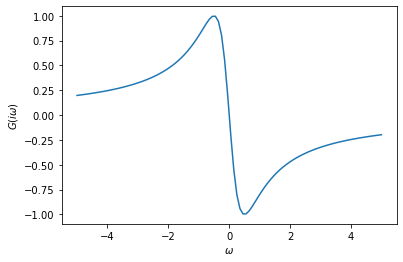

In [63]:
def g(z):
    value = 1/2 * (1/(z - (U/2)) + 1/(z + (U/2)))
    return value

omega = np.linspace(-5, 5, 100)

plt.xlabel("$\omega$")
plt.ylabel("$G(i \omega)$")
#\nuが出力できません
plt.plot(omega, np.imag(g(1j * omega)))
plt.show()

Exercise2

Exercise3

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


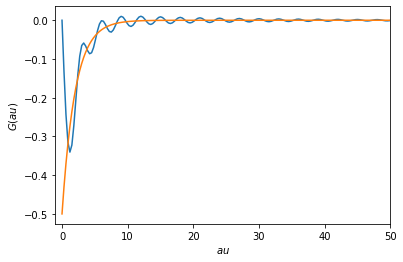

In [64]:
# def func(re):
#     s = np.sum(np.e ** (- re * tau) * g(tau))
#     return s

def func(re):
    s = 0
    for idx in range(200):
        omega_n = np.pi * (2 * (100 - idx) + 1)/beta
        s += 1/beta * np.e ** (-re * 1j * omega_n) * g(1j * omega_n)
    return s

plt.xlabel("$tau$")
plt.ylabel("$G(tau)$")
plt.plot(tau, func(tau))
plt.plot(tau, G(tau))
plt.xlim(-1, 50)
plt.show()

Exercise4

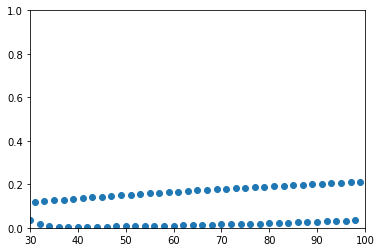

In [ ]:
G_l = np.zeros(100)
x_l = range(100)
for l in range(100):
    for c in range(10000):
        dtau = beta/10000
        tau_f = beta * c/10000
        x_tau = 2 * tau_f/beta - 1
        G_l[l] += np.sqrt(2*l + 1) * dtau * scipy.special.eval_legendre(l, x_tau) * G(tau_f)
    

plt.xlim(30, 100)
plt.ylim(0, 1)
plt.scatter(x_l, np.abs(G_l))
plt.show()

Exercise6

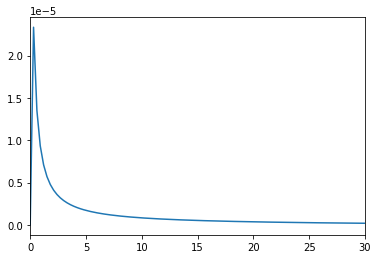

In [ ]:
def g_til(z):
    fu = g(z) - 1/z
    return fu

def G_til(tau_til):
    fu = 0
    for r in range(2000):
        nu_n = np.pi * (2 * (1000 - r) + 1)/beta
        fu += 1/beta * np.e ** (-1j * nu_n * tau_til) * g_til(1j * nu_n)
    fu = fu -1/2
    return fu
    #n_max...

def F(tau):
    y = G(tau) - np.real(G_til(tau))
    return y

plt.xlabel("$tau$")
plt.ylabel("error")
plt.xlim(0, 30)
# plt.plot(tau, np.real(G_til(tau)))
# plt.plot(tau, G(tau))
plt.plot(tau, F(tau))
plt.show()